## Import Data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel(io='/Data Science/Online Retail/Data.xlsx')

In [3]:
df.shape

(525461, 8)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Product Analitics

### Quantity Distribution

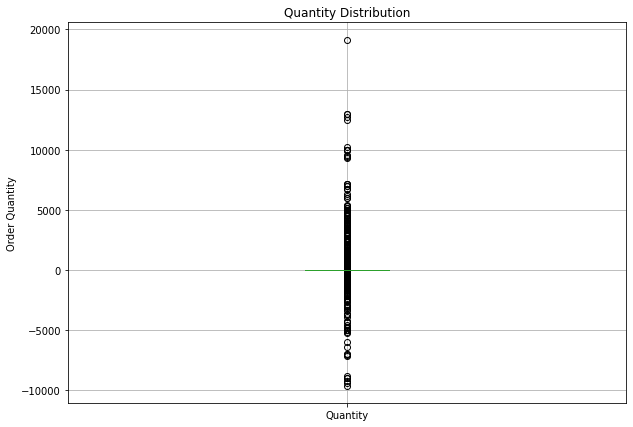

In [5]:
# Melihat seberapa banyak produk terjual

ax = df['Quantity'].plot.box(
# showfilers=False,
grid=True,
figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

# produk yg terjual bisa dilihat dari range 0 keatas

In [6]:
# melihat deskripsi keseluruhan data
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,525461.000000
mean,10.337667
std,107.424110
min,-9600.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,19152.000000


In [7]:
# melihat banyaknya produk yang terjual atau quantitynya diatas nol
df.loc[df['Quantity'] > 0].shape

(513135, 8)

In [8]:
df.shape

(525461, 8)

In [9]:
# memfilter dan menyimpan data yg akan digunakan / menyimpan data yg nilai quantitynya diatas nol
df = df.loc[df['Quantity'] > 0]

## Time Series Number of Orders

In [10]:
# melihat banyaknya produk yg terjual setiap bulannya
monthly_orders_df = df.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

In [11]:
monthly_orders_df

InvoiceDate
2009-12-31    1839
2010-01-31    1205
2010-02-28    1282
2010-03-31    1770
2010-04-30    1513
2010-05-31    1642
2010-06-30    1719
2010-07-31    1585
2010-08-31    1511
2010-09-30    1911
2010-10-31    2371
2010-11-30    2868
2010-12-31     888
Freq: M, Name: Invoice, dtype: int64

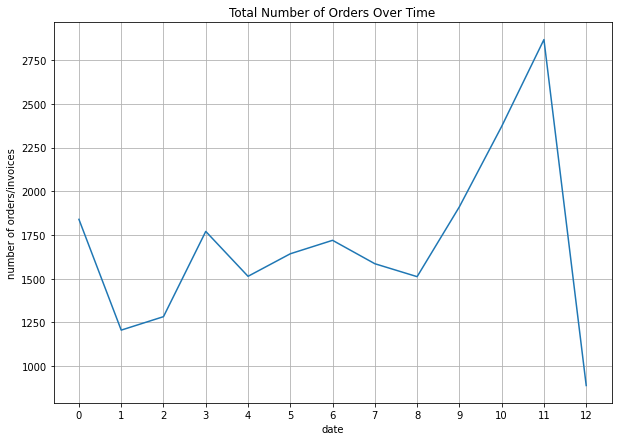

In [12]:
# melihat total penjualan setiap bulan
ax = pd.DataFrame(monthly_orders_df.values).plot(
grid=True,
figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
range(len(monthly_orders_df))),
[x.strftime('%m.%Y') for x in monthly_orders_df.index],
rotation=45

plt.show()

In [13]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2010-12-01',
    'InvoiceDate'
]

In [14]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2010-12-01 08:26:00
Max date: 2010-12-09 20:01:00


In [15]:
df=df.loc[df['InvoiceDate'] < '2010-12-01']

In [16]:
monthly_orders_df = df.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

In [17]:
monthly_orders_df

InvoiceDate
2009-12-31    1839
2010-01-31    1205
2010-02-28    1282
2010-03-31    1770
2010-04-30    1513
2010-05-31    1642
2010-06-30    1719
2010-07-31    1585
2010-08-31    1511
2010-09-30    1911
2010-10-31    2371
2010-11-30    2868
Freq: M, Name: Invoice, dtype: int64

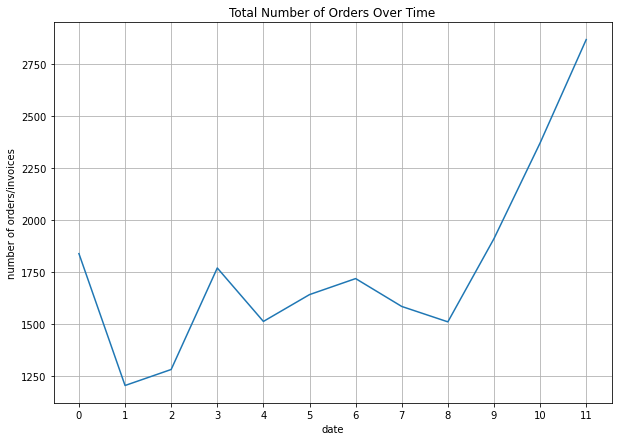

In [18]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
grid=True,
figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
range(len(monthly_orders_df))),
[x.strftime('%m.%Y') for x in monthly_orders_df.index],
rotation=45

plt.show()

## Time Series Revenue

In [19]:
df['Sales'] = df['Quantity'] * df['Price']

In [20]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [21]:
monthly_revenue_df

InvoiceDate
2009-12-31     825685.760
2010-01-31     652708.502
2010-02-28     553713.306
2010-03-31     833570.131
2010-04-30     627934.632
2010-05-31     659858.860
2010-06-30     752270.140
2010-07-31     606681.150
2010-08-31     697274.910
2010-09-30     924333.011
2010-10-31    1126558.040
2010-11-30    1470272.482
Freq: M, Name: Sales, dtype: float64

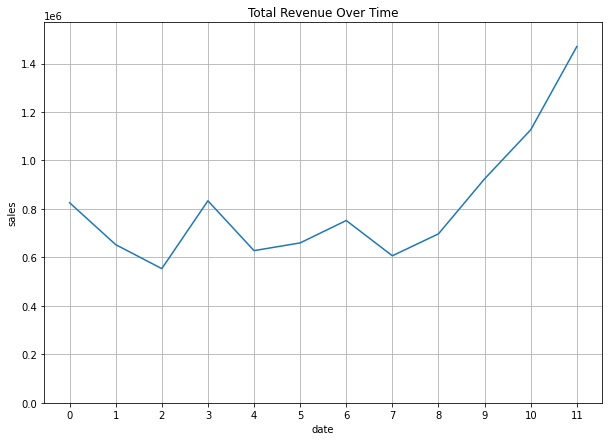

In [22]:
# melihat banyaknya keuntungan penjualan setiap bulannya
ax = pd.DataFrame(monthly_revenue_df.values).plot(
grid=True,
figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
range(len(monthly_revenue_df))),
[x.strftime('%m.%Y') for x in monthly_revenue_df.index],
rotation=45

plt.show()

## Time Series Repeat Customers

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [24]:
invoice_customer_df = df.groupby(
by=['Invoice', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'Customer ID' : max,
    'Country' : max,
}).reset_index()
    

In [25]:
invoice_customer_df.head()

,Invoice,InvoiceDate,Sales,Customer ID,Country
0,489434,2009-12-01 07:45:00,505.30,13085.0,United Kingdom
1,489435,2009-12-01 07:46:00,145.80,13085.0,United Kingdom
2,489436,2009-12-01 09:06:00,630.33,13078.0,United Kingdom
3,489437,2009-12-01 09:08:00,310.75,15362.0,United Kingdom
4,489438,2009-12-01 09:24:00,2286.24,18102.0,United Kingdom


In [26]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

In [27]:
monthly_repeat_customers_df

InvoiceDate
2009-12-31    286
2010-01-31    148
2010-02-28    175
2010-03-31    238
2010-04-30    203
2010-05-31    228
2010-06-30    258
2010-07-31    256
2010-08-31    223
2010-09-30    278
2010-10-31    357
2010-11-30    529
Freq: M, Name: Customer ID, dtype: int64

In [28]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()

In [29]:
monthly_unique_customers_df

InvoiceDate
2009-12-31     955
2010-01-31     720
2010-02-28     774
2010-03-31    1057
2010-04-30     942
2010-05-31     966
2010-06-30    1041
2010-07-31     928
2010-08-31     911
2010-09-30    1145
2010-10-31    1497
2010-11-30    1607
Freq: M, Name: Customer ID, dtype: int64

In [30]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2009-12-31    29.947644
2010-01-31    20.555556
2010-02-28    22.609819
2010-03-31    22.516556
2010-04-30    21.549894
2010-05-31    23.602484
2010-06-30    24.783862
2010-07-31    27.586207
2010-08-31    24.478595
2010-09-30    24.279476
2010-10-31    23.847695
2010-11-30    32.918482
Freq: M, Name: Customer ID, dtype: float64

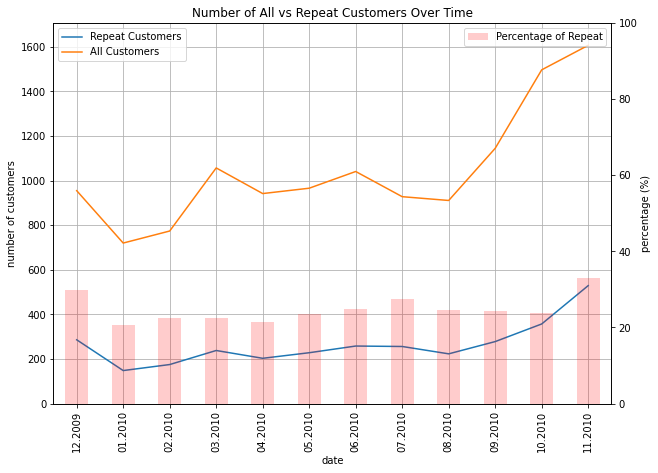

In [31]:

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10, 7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='red',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs Repeat Customers Over Time')
    
ax2.set_ylabel('percentage (%)')
    
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
   
plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45

)

plt.show()   

## Popular Items Over Time

In [32]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode             
2009-12-31  10002              216
            10080                4
            10109                4
            10120              115
            10125              128
...                            ...
2010-11-30  PADS                 2
            POST               966
            gift_0001_10         1
            gift_0001_20         1
            gift_0001_30         1

[33214 rows x 1 columns]

In [33]:
# Rank items by thee last month sales
last_month_sorted_df = date_item_df.loc['2010-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2010-11-30,84347,12445
1,2010-11-30,17003,10643
2,2010-11-30,84077,9605
3,2010-11-30,84879,9287
4,2010-11-30,22197,9184
...,...,...,...
3035,2010-11-30,90059F,1
3036,2010-11-30,90060D,1
3037,2010-11-30,21924,1
3038,2010-11-30,47567b,1


In [37]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([84347, 17003, 84077, 84879, 22197])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2009-12-31  17003           801
            22197          1929
            84077          2703
            84347          1987
            84879          4642
2010-01-31  17003           961
            22197           737
            84077          1443
            84347            43
            84879          1509
2010-02-28  17003          1895
            22197          1580
            84077          2400
            84347             3
            84879          1667
2010-03-31  17003           997
            22197          1512
            84077          4563
            84347             4
            84879          3341
2010-04-30  17003           901
            22197          1836
            84077          3744
            84347             6
            84879          2793
2010-05-31  17003          3970
            22197           806
            84077          3232
            84879          2168
2010-06-30  17003          3360
            22197          1786
            84077          5515
            84347             3
            84879          1862
2010-07-31  17003          1191
            22197          2146
            84077          3015
            84347            80
            84879          3133
2010-08-31  17003          1944
            22197          2579
            84077          5009
            84347           173
            84879          3171
2010-09-30  17003         13931
            22197          2890
            84077          4587
            84347          2692
            84879          4273
2010-10-31  17003          6765
            22197          5125
            84077          5627
            84347          4634
            84879          5994
2010-11-30  17003         10643
            22197          9184
            84077          9605
            84347         12445
            84879          9287

In [38]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)

trending_items_df

StockCode,17003,22197,84077,84347,84879
InvoiceDate,,,,,
2009-12-31,801.0,1929.0,2703.0,1987.0,4642.0
2010-01-31,961.0,737.0,1443.0,43.0,1509.0
2010-02-28,1895.0,1580.0,2400.0,3.0,1667.0
2010-03-31,997.0,1512.0,4563.0,4.0,3341.0
2010-04-30,901.0,1836.0,3744.0,6.0,2793.0
2010-05-31,3970.0,806.0,3232.0,0.0,2168.0
2010-06-30,3360.0,1786.0,5515.0,3.0,1862.0
2010-07-31,1191.0,2146.0,3015.0,80.0,3133.0
2010-08-31,1944.0,2579.0,5009.0,173.0,3171.0


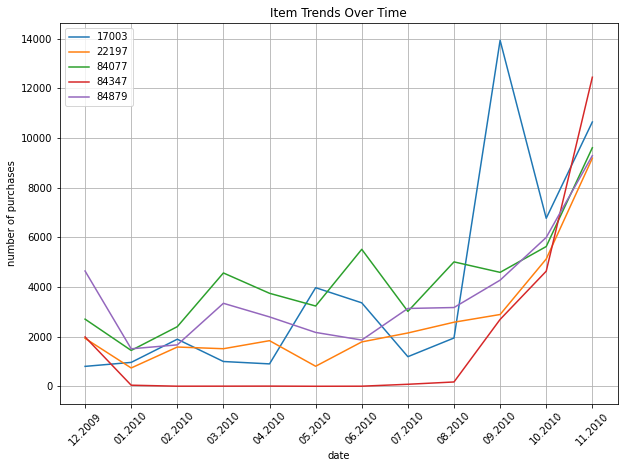

In [39]:
# melihat produk yang memungkinkan untuk meningkatkan penjualan pada bulan berikutnya
ax = pd.DataFrame(trending_items_df.values).plot(
    grid=True,
    figsize=(10, 7),
)

ax.set_xlabel('date')
ax.set_ylabel('number of purchases')
ax.set_title('Item Trends Over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.show()